<a href="https://colab.research.google.com/github/NID123-CH/Machine-Learning-and-Neural-Network/blob/Neural-Network/Final_Yolov8_Classification(Skin_disease).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jun 10 17:37:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [16]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5zpTfgCyK9ZorPN4aOGf")
project = rf.workspace("denise-manalo").project("skin-disease-9nagn")
dataset = project.version(1).download("folder")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Skin-Disease-1 in folder:: 100%|██████████| 2356/2356 [00:00<00:00, 2781.29it/s]


In [18]:
model = YOLO("yolov8n-cls.pt")


In [24]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data="/content/datasets/Skin-Disease-1" epochs=20 imgsz=128
     

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/datasets/Skin-Disease-1, epochs=20, patience=50, batch=16, imgsz=128, save=True, cache=False, device=, workers=16, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

In [33]:
!ls -la {HOME}/runs/classify/train8/

total 148
drwxr-xr-x  3 root root   4096 Jun 10 18:32 .
drwxr-xr-x 12 root root   4096 Jun 10 18:45 ..
-rw-r--r--  1 root root   1330 Jun 10 18:31 args.yaml
-rw-r--r--  1 root root 126248 Jun 10 18:34 events.out.tfevents.1686421922.e6d085ece891.24885.0
-rw-r--r--  1 root root   4032 Jun 10 18:34 results.csv
drwxr-xr-x  2 root root   4096 Jun 10 18:32 weights


In [34]:
!cat {HOME}/runs/classify/train8/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      0,                0.11706,                0.26263,                      1,                 24.445,                    0.1,                    0.1,                    0.1
                      1,                0.12579,                0.23232,                      1,                  0.526,                    0.1,                    0.1,                    0.1
                      2,                0.09981,                0.28283,                      1,                0.32007,                0.09505,                0.09505,                0.09505
                      3,                0.09628,                0.35354,                      1,                0.29626,                 0.0901,                 0.0901,                 0.0901
                      4,                

**Validation**

In [47]:

%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train8/weights/best.pt data={dataset.location}
     

/content
2023-06-10 19:19:10.583558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100% 7/7 [00:00<00:00, 19.16it/s]
                   all      0.333          1
Speed: 0.0ms pre-process, 2.1ms inference, 0.0ms loss, 0.0ms post-process per image


**Inference with Custom Model**

In [61]:

%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train8/weights/best.pt conf=0.25 source="/content/datasets/Skin-Disease-1/test/Warts"


/content
2023-06-10 19:36:50.026103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
image 1/25 /content/datasets/Skin-Disease-1/test/Warts/black-heel-2_jpg.rf.61b6df28512eca34809f5f5c3bf93993.jpg: 128x128 Keratosis Pilaris 0.28, Warts 0.19, Psoriasis 0.19, Acne 0.17, Eczema 0.17, 4.3ms
image 2/25 /content/datasets/Skin-Disease-1/test/Warts/black-heel-3_jpg.rf.1f93f565c6c708aba00a485fd50d247d.jpg: 128x128 Keratosis Pilaris 0.25, Warts 0.20, Psoriasis 0.19, Acne 0.18, Eczema 0.17, 4.2ms
image 3/25 /content/datasets/Skin-Disease-1/test/Warts/black-heel-8_jpg.rf.4787143733bd8aa490a14144fb2d3199.jpg: 128x128 Eczema 0.22, Warts 0.20, Psoriasis 0.20, Acne 0.20, Keratosis Pilaris 0.18, 2.7ms
image 4/25 /content/datasets/Skin-Disease-1/test/Warts/corns-16_jpg.rf.53a9855cbde5a8e0

In [63]:
model.predict("/content/datasets/Skin-Disease-1/test/Warts", save=True, imgsz=320, conf=0.5)

Results saved to runs/classify/predict


[tensor([0.18243, 0.19088, 0.22126, 0.21165, 0.19378], device='cuda:0'),
 tensor([0.18408, 0.19173, 0.21461, 0.21557, 0.19401], device='cuda:0'),
 tensor([0.21065, 0.22148, 0.17127, 0.18260, 0.21400], device='cuda:0'),
 tensor([0.21422, 0.17796, 0.18024, 0.20296, 0.22463], device='cuda:0'),
 tensor([0.21045, 0.19468, 0.18363, 0.19974, 0.21150], device='cuda:0'),
 tensor([0.17677, 0.25012, 0.17468, 0.19766, 0.20077], device='cuda:0'),
 tensor([0.18069, 0.16969, 0.24993, 0.21315, 0.18654], device='cuda:0'),
 tensor([0.17932, 0.26498, 0.17383, 0.19594, 0.18593], device='cuda:0'),
 tensor([0.18165, 0.28518, 0.16256, 0.17885, 0.19177], device='cuda:0'),
 tensor([0.16773, 0.29142, 0.17334, 0.17909, 0.18842], device='cuda:0'),
 tensor([0.23731, 0.22677, 0.16457, 0.17367, 0.19767], device='cuda:0'),
 tensor([0.21573, 0.23875, 0.16406, 0.18311, 0.19836], device='cuda:0'),
 tensor([0.16721, 0.30249, 0.16862, 0.17305, 0.18862], device='cuda:0'),
 tensor([0.35584, 0.15959, 0.15684, 0.15994, 0.1677

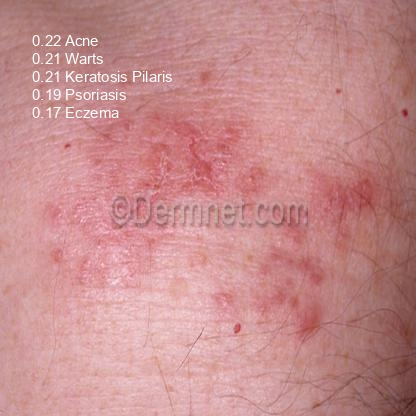

In [64]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")